ETL and EDA    
Fintech 540 - Team 6  
**Machine Learning for Financial Technology**

# 540 Project - Vols - EDA 1

In [2]:
import pandas as pd

# Load the core files from the Excel workbook
dates_df = pd.read_excel("RV_March2024.xlsx", sheet_name="Dates", header=None)
companies_df = pd.read_excel("RV_March2024.xlsx", sheet_name="Companies", header=None)
rv_df = pd.read_excel("RV_March2024.xlsx", sheet_name="RV", header=None)

# Inspect the loaded dataframes
print("--- Dates DataFrame Head ---")
print(dates_df.head())
print("\n--- Dates DataFrame Info ---")
dates_df.info()

print("\n--- Companies DataFrame Head ---")
print(companies_df.head())
print("\n--- Companies DataFrame Info ---")
companies_df.info()

print("\n--- RV DataFrame Shape and Head (First 5 rows and 5 columns) ---")
print(f"Shape: {rv_df.shape}")
print(rv_df.iloc[:5, :5])
print("\n--- RV DataFrame Info (Abridged) ---")
rv_df.info(verbose=False)

--- Dates DataFrame Head ---
             0
0  02-Jan-2003
1  03-Jan-2003
2  06-Jan-2003
3  07-Jan-2003
4  08-Jan-2003

--- Dates DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346 entries, 0 to 5345
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5346 non-null   object
dtypes: object(1)
memory usage: 41.9+ KB

--- Companies DataFrame Head ---
      0
0  AAPL
1  AMGN
2  AMZN
3   AXP
4    BA

--- Companies DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30 non-null     object
dtypes: object(1)
memory usage: 372.0+ bytes

--- RV DataFrame Shape and Head (First 5 rows and 5 columns) ---
Shape: (5346, 30)
           0         1          2         3         4
0   8.308199  4.572077  10.302664  4.726601  8.298957
1   6.568160  2.941836   6.795265

In [3]:
# 1. Prepare and structure the main RV DataFrame
# Set the column names to the company tickers
rv_df.columns = companies_df[0].tolist()

# Set the index to the dates and convert to datetime
rv_df.index = pd.to_datetime(dates_df[0], format='%d-%b-%Y')
rv_df.index.name = 'Date'

# 2. Melt the DataFrame to long format
# The `variable_name` will be 'Ticker', and the `value_name` will be 'RV'
rv_long_df = rv_df.melt(ignore_index=False, var_name='Ticker', value_name='RV').reset_index()

# Check the structured long format DataFrame
print("--- Structured RV Long Format DataFrame Head ---")
print(rv_long_df.head())
print("\n--- Structured RV Long Format DataFrame Info ---")
rv_long_df.info()

# Save the structured DataFrame for later use
rv_long_df.to_csv("structured_RV_data.csv", index=False)

--- Structured RV Long Format DataFrame Head ---
        Date Ticker         RV
0 2003-01-02   AAPL   8.308199
1 2003-01-03   AAPL   6.568160
2 2003-01-06   AAPL   7.344418
3 2003-01-07   AAPL  10.013332
4 2003-01-08   AAPL   6.098212

--- Structured RV Long Format DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160380 entries, 0 to 160379
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    160380 non-null  datetime64[ns]
 1   Ticker  160380 non-null  object        
 2   RV      160380 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.7+ MB


In [4]:
# Load the structured RV data
rv_long_df = pd.read_csv("structured_RV_data.csv")

# Convert 'Date' to datetime and 'Ticker' to category for efficiency
rv_long_df['Date'] = pd.to_datetime(rv_long_df['Date'])
rv_long_df['Ticker'] = rv_long_df['Ticker'].astype('category')

# Check for zeros (as per readme, these are missing values) and NaN
zero_count = (rv_long_df['RV'] == 0.0).sum()
zero_percent = (zero_count / len(rv_long_df)) * 100
nan_count = rv_long_df['RV'].isna().sum()

print(f"Total number of entries: {len(rv_long_df)}")
print(f"Number of zeros (missing data): {zero_count} ({zero_percent:.2f}%)")
print(f"Number of NaN values: {nan_count}")

# Descriptive statistics for Realized Variance (RV)
print("\n--- Descriptive Statistics for RV ---")
print(rv_long_df['RV'].describe())

Total number of entries: 160380
Number of zeros (missing data): 6805 (4.24%)
Number of NaN values: 0

--- Descriptive Statistics for RV ---
count    160380.000000
mean          2.375647
std           6.125345
min           0.000000
25%           0.711934
50%           1.232015
75%           2.278508
max         659.287443
Name: RV, dtype: float64


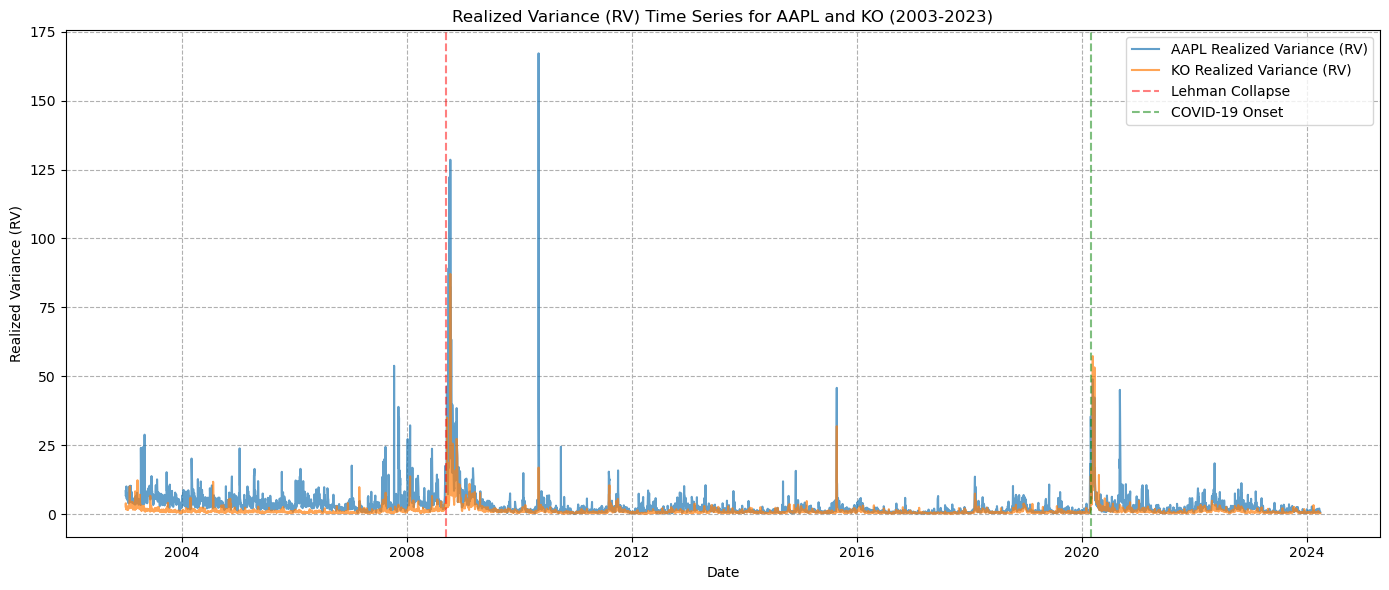

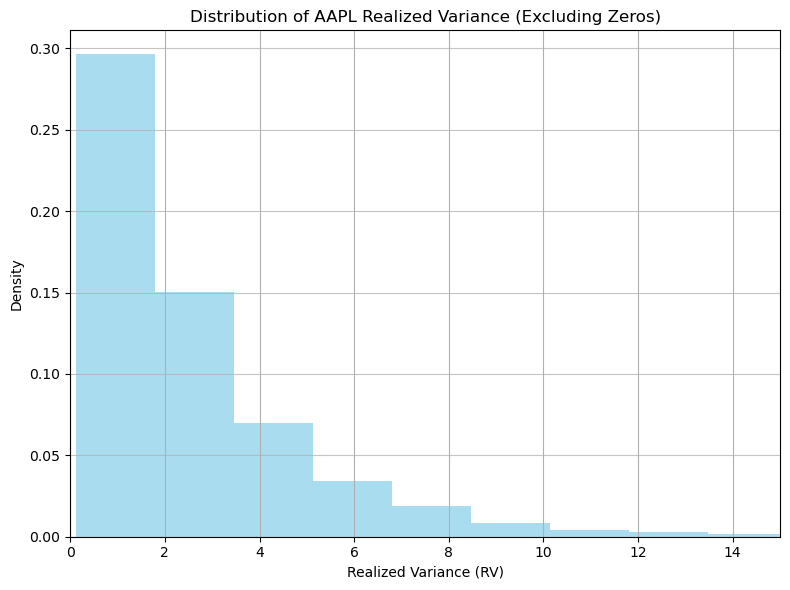

Time series and histogram plots generated.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the structured RV data
rv_long_df = pd.read_csv("structured_RV_data.csv")
rv_long_df['Date'] = pd.to_datetime(rv_long_df['Date'])

# Replace zeros with NaN for clearer visualization and future imputation
rv_long_df['RV_clean'] = rv_long_df['RV'].replace(0.0, np.nan)

# Select two companies for time series plot
aapl_rv = rv_long_df[rv_long_df['Ticker'] == 'AAPL'].set_index('Date')['RV_clean']
ko_rv = rv_long_df[rv_long_df['Ticker'] == 'KO'].set_index('Date')['RV_clean']

# --- Plot 1: Time Series Comparison ---
plt.figure(figsize=(14, 6))
plt.plot(aapl_rv, label='AAPL Realized Variance (RV)', alpha=0.7)
plt.plot(ko_rv, label='KO Realized Variance (RV)', alpha=0.7)

# Highlight key events (e.g., Financial Crisis 2008, COVID-19 2020)
plt.axvline(pd.to_datetime('2008-09-15'), color='r', linestyle='--', alpha=0.5, label='Lehman Collapse')
plt.axvline(pd.to_datetime('2020-03-01'), color='g', linestyle='--', alpha=0.5, label='COVID-19 Onset')

plt.title('Realized Variance (RV) Time Series for AAPL and KO (2003-2023)')
plt.xlabel('Date')
plt.ylabel('Realized Variance (RV)')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
#plt.savefig('rv_timeseries_aapl_ko.png')
plt.show()
plt.close()

# --- Plot 2: Histogram (Distribution) for AAPL ---
plt.figure(figsize=(8, 6))
aapl_rv.hist(bins=100, density=True, alpha=0.7, color='skyblue')
plt.title('Distribution of AAPL Realized Variance (Excluding Zeros)')
plt.xlabel('Realized Variance (RV)')
plt.ylabel('Density')
plt.xlim(0, 15) # Zoom in to the most common range for better visualization
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
#plt.savefig('rv_aapl_histogram.png')
plt.show()

plt.close()

plt.show()

print("Time series and histogram plots generated.")

In [9]:
rv_df

,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,8.308199,4.572077,10.302664,4.726601,8.298957,2.437260,0.000000,6.282753,1.196666,5.258330,...,1.470031,3.027056,2.877754,2.862436,1.841939,0.000000,2.435372,0.000000,2.947733,1.699878
2003-01-03,6.568160,2.941836,6.795265,5.646306,5.649752,1.454172,0.000000,6.519370,1.204508,8.370384,...,1.846385,1.162521,2.719427,2.292061,1.784124,0.000000,1.933458,0.000000,4.058668,2.688825
2003-01-06,7.344418,3.028149,7.119561,4.832549,4.127986,2.086301,0.000000,3.347617,1.327857,2.913129,...,0.976623,1.608573,1.534497,2.119646,1.079709,0.000000,1.507197,0.000000,4.487777,1.411281
2003-01-07,10.013332,4.169076,11.734948,5.869388,7.308662,2.476460,0.000000,6.591392,1.887262,6.031596,...,1.367421,1.518729,3.874614,2.084995,1.585760,0.000000,2.173059,0.000000,4.637851,2.233801
2003-01-08,6.098212,3.740469,5.466799,5.141820,3.147498,3.462885,0.000000,4.249950,1.826372,7.362702,...,1.119423,1.252227,2.930248,3.397223,0.941179,0.000000,2.828552,0.000000,4.275193,1.881002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,1.133683,1.358973,0.643485,0.861365,2.884347,0.844053,0.734178,0.452280,0.378174,1.191391,...,1.218190,0.944311,0.567167,9.850213,0.227475,0.431583,0.756057,0.759779,0.821683,0.534969
2024-03-25,0.753178,0.877795,0.782093,0.764498,3.691857,0.764588,0.962078,0.577144,0.784357,2.442456,...,1.462266,1.164635,0.854689,2.859654,0.499669,0.503122,0.659841,0.794563,0.744996,0.622287
2024-03-26,0.563206,1.305065,0.934476,0.724294,2.011953,0.855850,0.921370,0.333493,0.639183,1.389897,...,1.989857,0.836721,0.534463,1.081911,0.359653,1.035428,0.769868,1.614903,0.483628,0.623520


**Exploratory Data Analysis: RV_March2024.xlsx**  
  
High-Frequency Volatility Measures for 30 Dow Jones Companies (2003-2023)

**Dataset Overview:**  
This Excel workbook contains 13 sheets of high-frequency volatility measures calculated from 1-minute and 5-minute price data for 30 Dow Jones Industrial Average components.

**Sheet Descriptions:**
- **Dates**: Trading dates (5,346 days from 2003-2023)
- **Companies**: Ticker symbols (30 stocks)
- **RV**: Realized Variance (1-min) - total daily variance
- **BPV**: Bipower Variation (1-min) - robust variance estimator
- **Good**: Good Variance (1-min) - continuous price movement component
- **Bad**: Bad Variance (1-min) - jump component (discontinuous movements)
- **RQ**: Realized Quarticity (1-min) - 4th moment estimator for variance of variance
- **RV_5, BPV_5, Good_5, Bad_5, RQ_5**: Same measures at 5-minute frequency
 
**Key Notes:**
1. Missing data is encoded as **zeros** (not NaN)
2. All data organized with dates as rows, companies as columns
3. Good + Bad = RV (variance decomposition)


**1. Initial Setup and Data Loading:**  
We begin by importing necessary libraries and loading the core reference sheets (Dates and Companies).

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10


In [13]:
# Load reference sheets
dates_df = pd.read_excel("RV_March2024.xlsx", sheet_name="Dates", header=None)
companies_df = pd.read_excel("RV_March2024.xlsx", sheet_name="Companies", header=None)

print(f"Time Period: {len(dates_df)} trading days")
print(f"Companies: {len(companies_df)} tickers")
print(f"\nTicker List:\n{companies_df[0].tolist()}")

Time Period: 5346 trading days
Companies: 30 tickers

Ticker List:
['AAPL', 'AMGN', 'AMZN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WMT']


**2. Load and Structure All Data Sheets**  
We load all 10 volatility measure sheets and structure them with proper date indices and company column names.


In [14]:
# Load all data sheets
sheet_names = ['RV', 'BPV', 'Good', 'Bad', 'RQ', 'RV_5', 'BPV_5', 'Good_5', 'Bad_5', 'RQ_5']
data_dict = {}

for sheet in sheet_names:
    df = pd.read_excel("RV_March2024.xlsx", sheet_name=sheet, header=None)
    df.columns = companies_df[0].tolist()
    df.index = pd.to_datetime(dates_df[0], format='%d-%b-%Y')
    df.index.name = 'Date'
    data_dict[sheet] = df
    print(f"Loaded {sheet}: Shape {df.shape}")

print(f"\nDate Range: {data_dict['RV'].index.min()} to {data_dict['RV'].index.max()}")

Loaded RV: Shape (5346, 30)
Loaded BPV: Shape (5346, 30)
Loaded Good: Shape (5346, 30)
Loaded Bad: Shape (5346, 30)
Loaded RQ: Shape (5346, 30)
Loaded RV_5: Shape (5346, 30)
Loaded BPV_5: Shape (5346, 30)
Loaded Good_5: Shape (5346, 30)
Loaded Bad_5: Shape (5346, 30)
Loaded RQ_5: Shape (5346, 30)

Date Range: 2003-01-02 00:00:00 to 2024-03-28 00:00:00


**3. Realized Variance (RV) - Primary Analysis**  
Realized Variance is the sum of squared intraday returns, providing a model-free estimate of daily volatility. We'll analyze its distribution, missing data patterns, and basic statistics.

In [15]:
# Convert RV to long format for analysis
rv_df = data_dict['RV']
rv_long = rv_df.melt(ignore_index=False, var_name='Ticker', value_name='RV').reset_index()

# Missing data analysis
total_obs = len(rv_long)
zero_count = (rv_long['RV'] == 0.0).sum()
zero_percent = (zero_count / total_obs) * 100

print("="*60)
print("MISSING DATA ANALYSIS")
print("="*60)
print(f"Total observations: {total_obs:,}")
print(f"Missing (zeros): {zero_count:,} ({zero_percent:.2f}%)")
print(f"Complete observations: {total_obs - zero_count:,}")

# Create clean version (excluding zeros)
rv_long['RV_clean'] = rv_long['RV'].replace(0.0, np.nan)

# Summary statistics
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS (excluding zeros)")
print("="*60)
print(rv_long['RV_clean'].describe())

MISSING DATA ANALYSIS
Total observations: 160,380
Missing (zeros): 6,805 (4.24%)
Complete observations: 153,575

DESCRIPTIVE STATISTICS (excluding zeros)
count    153575.000000
mean          2.480913
std           6.238688
min           0.087226
25%           0.768848
50%           1.288221
75%           2.356818
max         659.287443
Name: RV_clean, dtype: float64


**4. Distribution Analysis and Extreme Values**   
Volatility data typically exhibits heavy right tails due to occasional market stress periods. We examine the distribution and identify extreme events.

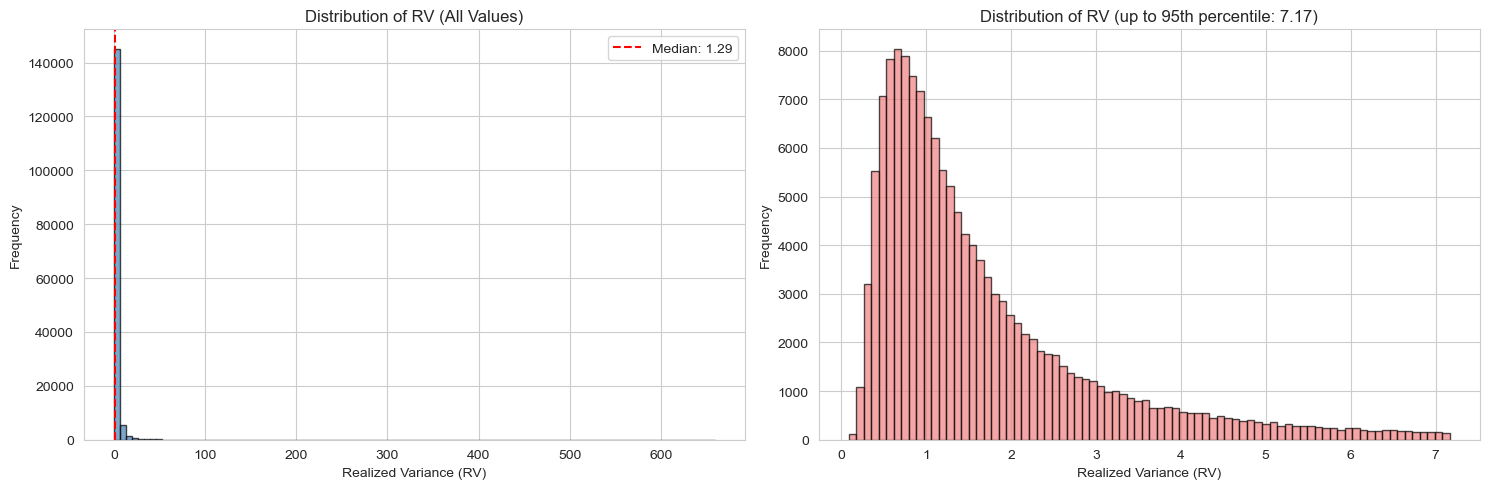


EXTREME VALUES (Top 10)
      Date Ticker         RV
2010-05-06     PG 659.287443
2008-09-18     GS 467.972381
2008-10-10     GS 405.356022
2015-08-24     HD 363.956929
2015-08-24    JPM 362.291944
2020-03-17     BA 336.956983
2008-10-10    TRV 323.677016
2008-09-17     GS 302.507937
2008-10-10    AXP 275.223225
2008-10-10    JPM 247.389236


In [16]:
# Create visualization of RV distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram (full range)
axes[0].hist(rv_long['RV_clean'].dropna(), bins=100, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Realized Variance (RV)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of RV (All Values)')
axes[0].axvline(rv_long['RV_clean'].median(), color='red', linestyle='--', label=f'Median: {rv_long["RV_clean"].median():.2f}')
axes[0].legend()

# Histogram (zoomed to 95th percentile)
p95 = rv_long['RV_clean'].quantile(0.95)
axes[1].hist(rv_long['RV_clean'][rv_long['RV_clean'] <= p95].dropna(), bins=80, 
             alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Realized Variance (RV)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Distribution of RV (up to 95th percentile: {p95:.2f})')

plt.tight_layout()
plt.show()

# Identify extreme events
print("\n" + "="*60)
print("EXTREME VALUES (Top 10)")
print("="*60)
top_events = rv_long.nlargest(10, 'RV')[['Date', 'Ticker', 'RV']]
print(top_events.to_string(index=False))

**5. Time Series Visualization**  
We plot RV over time for selected companies to visualize volatility clustering and identify crisis periods (2008 Financial Crisis, 2020 COVID-19).


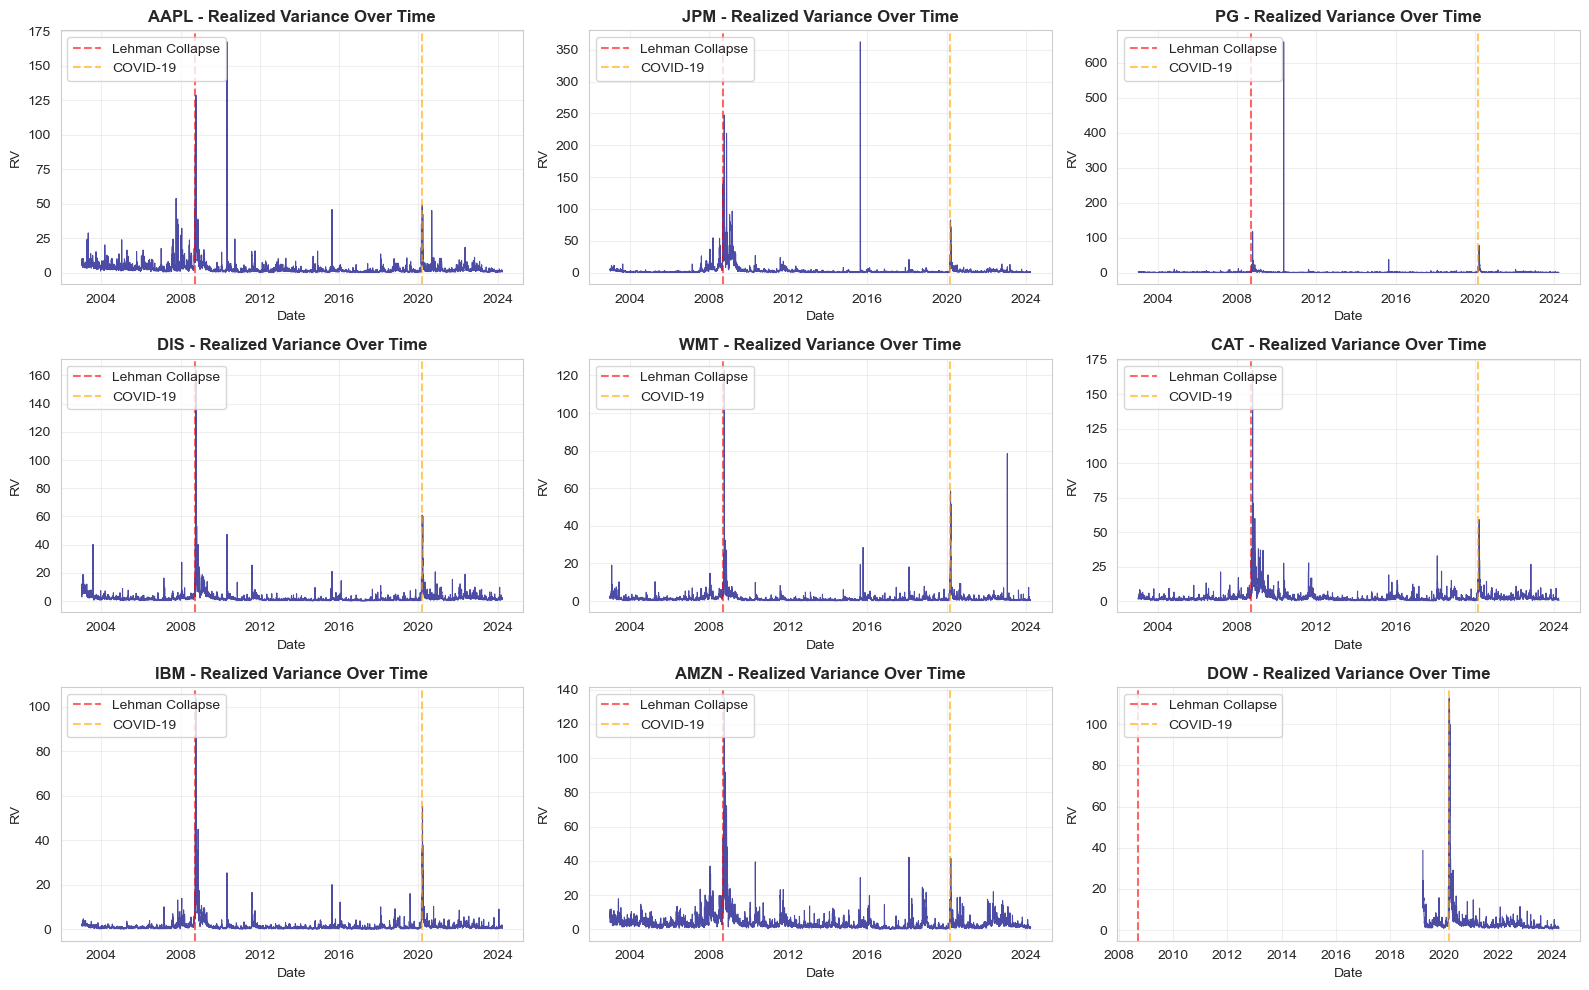

In [24]:
sample_tickers = ['AAPL', 'JPM', 'PG', 'DIS', 'WMT', 'CAT', 'IBM', 'AMZN', 'DOW']

fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, ticker in enumerate(sample_tickers):
    ticker_data = rv_df[ticker].replace(0, np.nan)
    
    axes[idx].plot(ticker_data.index, ticker_data, linewidth=0.8, alpha=0.7, color='navy')
    axes[idx].set_title(f'{ticker} - Realized Variance Over Time', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('RV')
    
    # Mark major events
    axes[idx].axvline(pd.to_datetime('2008-09-15'), color='red', linestyle='--', 
                      alpha=0.6, linewidth=1.5, label='Lehman Collapse')
    axes[idx].axvline(pd.to_datetime('2020-03-01'), color='orange', linestyle='--', 
                      alpha=0.6, linewidth=1.5, label='COVID-19')
    axes[idx].legend(loc='upper left')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**6. Company-Level Statistics**  
Different companies exhibit different volatility profiles. Tech stocks typically show higher variance than stable dividend stocks.


COMPANY RANKING BY AVERAGE REALIZED VARIANCE
Ticker     Mean   Median       Std       CV  Skewness  Missing_%        Max
   CRM 4.944159 3.068294  7.063672 1.428690  6.861519   6.921062 118.015319
   DOW 3.961002 2.314531  8.479620 2.140776  9.191231  76.318743 112.521380
  AMZN 3.937855 2.606000  5.674270 1.440955  8.571733   0.000000 134.763041
   JPM 3.514631 1.329396 10.661873 3.033568 14.848109   0.000000 362.291944
    GS 3.477499 1.594480 11.909360 3.424691 23.491556   0.000000 467.972381
   AXP 3.299684 1.207768  8.632480 2.616154 11.001991   0.000000 275.223225
    BA 3.137861 1.633608  8.260267 2.632451 20.763305   0.000000 336.956983
  AAPL 3.082584 1.801618  5.521493 1.791189 12.833425   0.000000 167.186512
   UNH 2.961367 1.538124  6.677832 2.254983 13.273638   0.000000 198.481559
   CAT 2.920138 1.696799  5.197067 1.779733 11.138256   0.000000 167.428956
  INTC 2.899365 1.985687  4.290798 1.479909 11.035643   0.000000 111.153371
   TRV 2.830399 1.044848  9.509077 3.359624

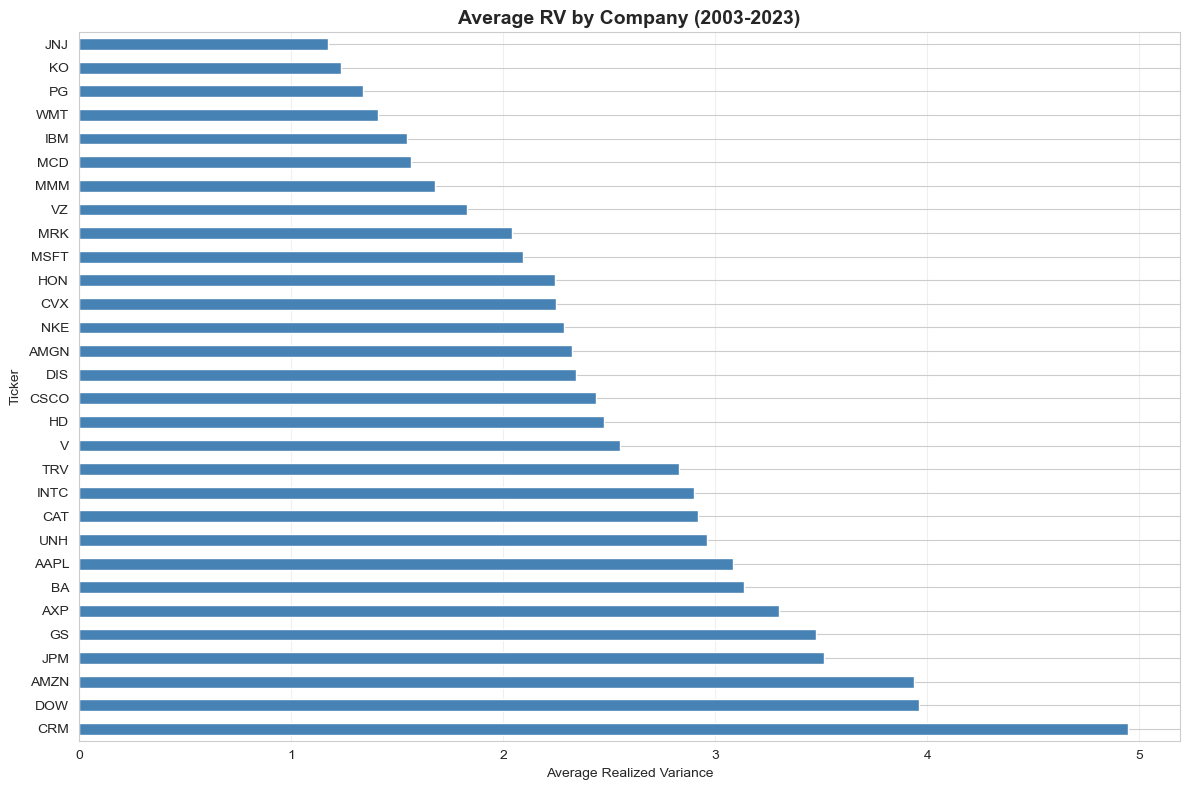

In [25]:
# Calculate per-company statistics
company_stats = []
for ticker in companies_df[0].tolist():
    ticker_rv = rv_long[rv_long['Ticker'] == ticker]['RV']
    ticker_clean = ticker_rv[ticker_rv > 0]
    
    company_stats.append({
        'Ticker': ticker,
        'Mean': ticker_clean.mean(),
        'Median': ticker_clean.median(),
        'Std': ticker_clean.std(),
        'CV': ticker_clean.std() / ticker_clean.mean(),  # Coefficient of variation
        'Skewness': ticker_clean.skew(),
        'Missing_%': (ticker_rv == 0).sum() / len(ticker_rv) * 100,
        'Max': ticker_clean.max()
    })

company_stats_df = pd.DataFrame(company_stats).sort_values('Mean', ascending=False)

print("="*60)
print("COMPANY RANKING BY AVERAGE REALIZED VARIANCE")
print("="*60)
print(company_stats_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))
company_stats_df.plot(x='Ticker', y='Mean', kind='barh', ax=ax, color='steelblue', legend=False)
ax.set_xlabel('Average Realized Variance')
ax.set_ylabel('Ticker')
ax.set_title('Average RV by Company (2003-2023)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**7. Temporal Patterns: Yearly Analysis**   
Volatility exhibits strong time-variation. We examine how average volatility evolved across different years, with particular attention to crisis periods.


YEARLY STATISTICS
        Mean  Median     Std      Max  Count
Year                                        
2003   2.847   2.189   2.360   40.196   6552
2004   1.908   1.284   2.901  100.985   6686
2005   1.696   1.217   1.986   51.813   6804
2006   1.714   1.256   1.662   53.049   6777
2007   2.482   1.538   3.844  189.842   6991
2008  10.409   4.628  18.587  467.972   7284
2009   5.035   3.054   6.499   96.502   7308
2010   2.241   1.490   8.542  659.287   7308
2011   2.311   1.456   2.697   51.119   7308
2012   1.350   1.021   1.515   89.654   7250
2013   1.148   0.893   1.009   26.589   7308
2014   1.136   0.792   1.195   24.942   7308
2015   1.688   1.045   7.619  363.957   7308
2016   1.339   0.883   1.559   33.818   7308
2017   0.766   0.584   0.707   10.832   7279
2018   1.938   1.217   2.331   42.115   7279
2019   1.265   0.925   1.344   38.763   7507
2020   5.135   2.050  11.345  336.957   7590
2021   1.564   1.196   1.765  104.355   7560
2022   2.703   2.103   2.210   57.310

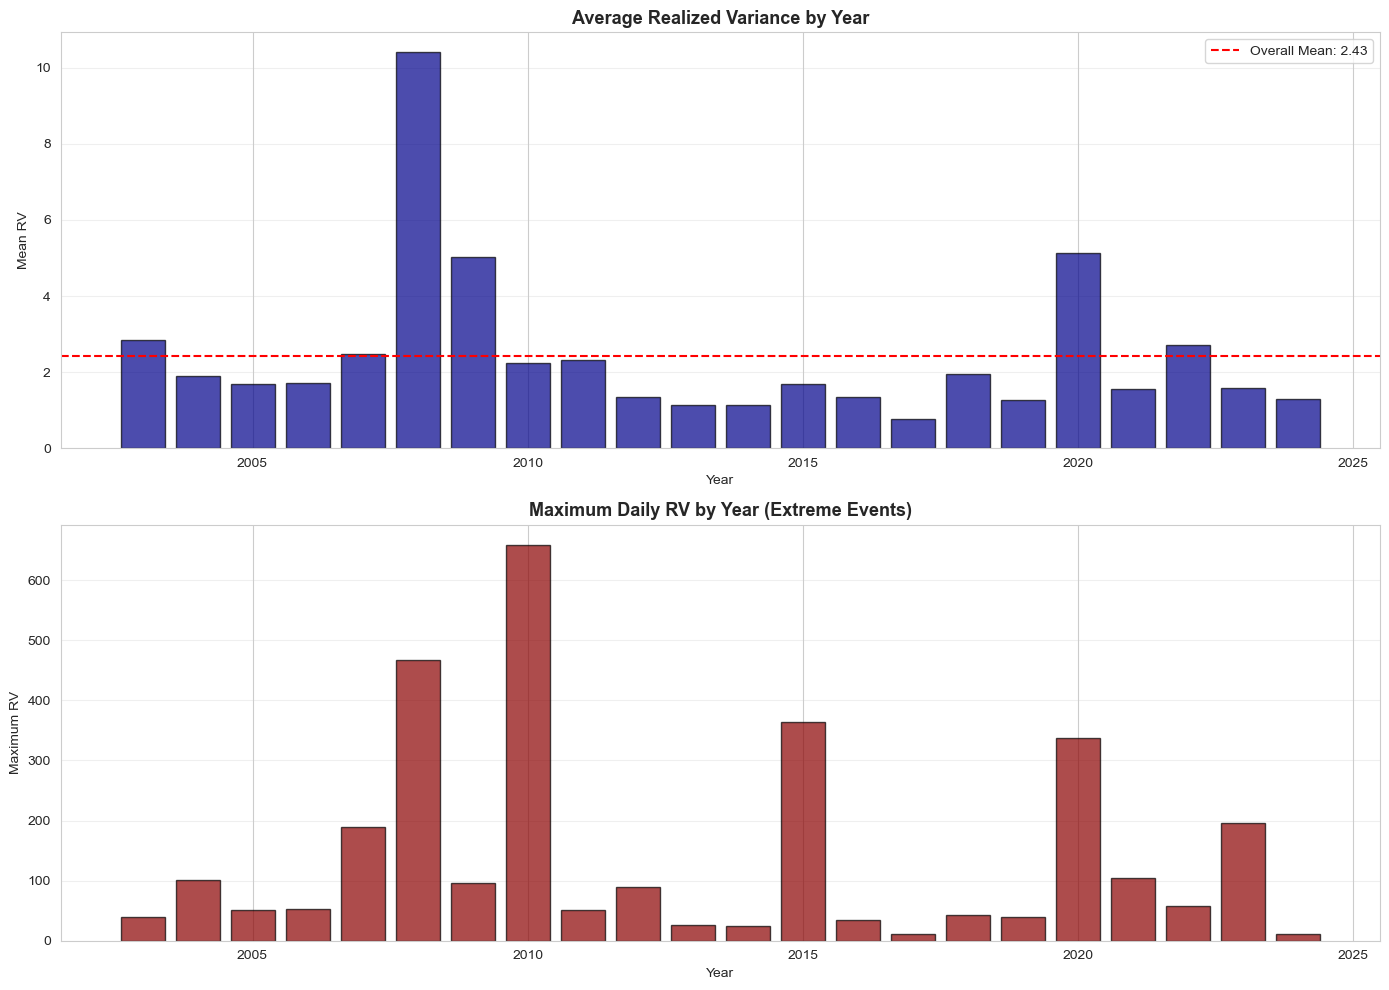

In [26]:
# Add year column
rv_long['Year'] = rv_long['Date'].dt.year

# Calculate yearly statistics
yearly_stats = rv_long[rv_long['RV'] > 0].groupby('Year').agg({
    'RV': ['mean', 'median', 'std', 'max', 'count']
}).round(3)

yearly_stats.columns = ['Mean', 'Median', 'Std', 'Max', 'Count']
print("="*60)
print("YEARLY STATISTICS")
print("="*60)
print(yearly_stats)

# Visualize yearly trends
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Mean RV by year
axes[0].bar(yearly_stats.index, yearly_stats['Mean'], color='darkblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean RV')
axes[0].set_title('Average Realized Variance by Year', fontsize=13, fontweight='bold')
axes[0].axhline(yearly_stats['Mean'].mean(), color='red', linestyle='--', 
                label=f'Overall Mean: {yearly_stats["Mean"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Max RV by year (shows crisis intensity)
axes[1].bar(yearly_stats.index, yearly_stats['Max'], color='darkred', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Maximum RV')
axes[1].set_title('Maximum Daily RV by Year (Extreme Events)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**8. Variance Decomposition: Good vs Bad Variance**  
  
A key innovation in realized variance research is decomposing total variance into:
- **Good Variance**: Continuous price diffusion (normal market activity)
- **Bad Variance**: Jump component (sudden large price movements)

Theory suggests: RV ≈ Good + Bad


Decomposition Verification for AAPL:
  Mean |RV - (Good + Bad)|: 0.000000
  Relative Error: 0.0000%

Average Variance Contribution:
  Good (Continuous): 50.07%
  Bad (Jumps): 49.93%


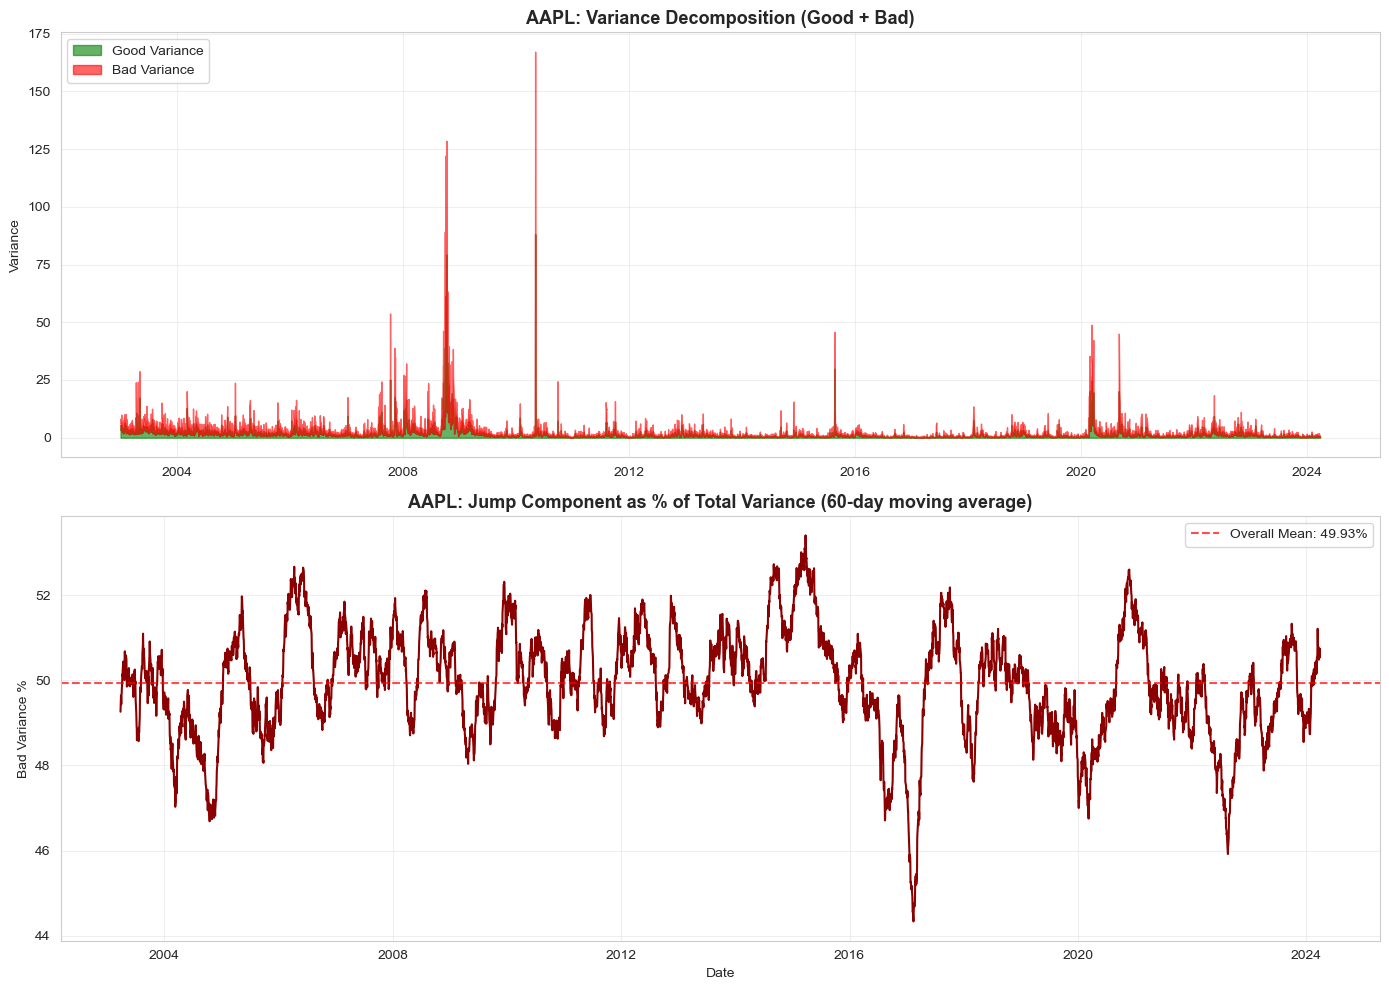

In [27]:
# Load Good and Bad variance
good_df = data_dict['Good']
bad_df = data_dict['Bad']

# Check decomposition for AAPL
ticker = 'AAPL'
rv_aapl = rv_df[ticker].replace(0, np.nan)
good_aapl = good_df[ticker].replace(0, np.nan)
bad_aapl = bad_df[ticker].replace(0, np.nan)

# Verify: Good + Bad ≈ RV
reconstructed_rv = good_aapl + bad_aapl
decomp_error = (rv_aapl - reconstructed_rv).abs().mean()

print(f"Decomposition Verification for {ticker}:")
print(f"  Mean |RV - (Good + Bad)|: {decomp_error:.6f}")
print(f"  Relative Error: {(decomp_error / rv_aapl.mean()) * 100:.4f}%")

# Calculate contribution ratios
good_ratio = (good_aapl / rv_aapl).mean()
bad_ratio = (bad_aapl / rv_aapl).mean()

print(f"\nAverage Variance Contribution:")
print(f"  Good (Continuous): {good_ratio*100:.2f}%")
print(f"  Bad (Jumps): {bad_ratio*100:.2f}%")

# Visualize decomposition
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Stacked area plot
axes[0].fill_between(rv_aapl.index, 0, good_aapl, alpha=0.6, color='green', label='Good Variance')
axes[0].fill_between(rv_aapl.index, good_aapl, rv_aapl, alpha=0.6, color='red', label='Bad Variance')
axes[0].set_ylabel('Variance')
axes[0].set_title(f'{ticker}: Variance Decomposition (Good + Bad)', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Ratio over time
bad_ratio_series = (bad_aapl / rv_aapl).rolling(window=60).mean() * 100
axes[1].plot(bad_ratio_series.index, bad_ratio_series, color='darkred', linewidth=1.5)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Bad Variance %')
axes[1].set_title(f'{ticker}: Jump Component as % of Total Variance (60-day moving average)', 
                  fontsize=13, fontweight='bold')
axes[1].axhline(bad_ratio*100, color='red', linestyle='--', alpha=0.7, 
                label=f'Overall Mean: {bad_ratio*100:.2f}%')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**9. Frequency Comparison: 1-min vs 5-min**   
The dataset includes measures at both 1-minute and 5-minute sampling frequencies. Theory suggests RV should scale approximately linearly with sampling frequency.


In [28]:
# Compare 1-min vs 5-min for all metrics
comparison_metrics = [('RV', 'RV_5'), ('BPV', 'BPV_5'), ('Good', 'Good_5'), 
                      ('Bad', 'Bad_5'), ('RQ', 'RQ_5')]

print("="*70)
print("FREQUENCY COMPARISON: 1-min vs 5-min")
print("="*70)

for metric1, metric5 in comparison_metrics:
    df1 = data_dict[metric1].replace(0, np.nan)
    df5 = data_dict[metric5].replace(0, np.nan)
    
    # Overall statistics
    mean1 = df1.mean().mean()
    mean5 = df5.mean().mean()
    ratio = mean1 / mean5
    
    # Correlation
    ticker_sample = 'AAPL'
    corr = df1[ticker_sample].corr(df5[ticker_sample])
    
    print(f"\n{metric1} vs {metric5}:")
    print(f"  Mean (1-min): {mean1:.4f}")
    print(f"  Mean (5-min): {mean5:.4f}")
    print(f"  Ratio: {ratio:.4f}")
    print(f"  Correlation ({ticker_sample}): {corr:.4f}")

FREQUENCY COMPARISON: 1-min vs 5-min

RV vs RV_5:
  Mean (1-min): 2.5271
  Mean (5-min): 2.3657
  Ratio: 1.0682
  Correlation (AAPL): 0.9283

BPV vs BPV_5:
  Mean (1-min): 2.3486
  Mean (5-min): 2.1853
  Ratio: 1.0747
  Correlation (AAPL): 0.9211

Good vs Good_5:
  Mean (1-min): 1.2673
  Mean (5-min): 1.1918
  Ratio: 1.0633
  Correlation (AAPL): 0.9218

Bad vs Bad_5:
  Mean (1-min): 1.2598
  Mean (5-min): 1.1738
  Ratio: 1.0732
  Correlation (AAPL): 0.9096

RQ vs RQ_5:
  Mean (1-min): 500.1378
  Mean (5-min): 117.5142
  Ratio: 4.2560
  Correlation (AAPL): 0.3728


**10. Missing Data Patterns**  
Understanding the pattern of missing data (zeros) is crucial for preprocessing decisions.

MISSING DATA BY COMPANY
Ticker  Missing_Count  Missing_%
   DOW           4080  76.318743
     V           1311  24.523008
   TRV           1044  19.528620
   CRM            370   6.921062
  AMZN              0   0.000000
   AXP              0   0.000000
   CAT              0   0.000000
    BA              0   0.000000
   CVX              0   0.000000
  CSCO              0   0.000000
   DIS              0   0.000000
    GS              0   0.000000
  AAPL              0   0.000000
  AMGN              0   0.000000
   HON              0   0.000000
    HD              0   0.000000
   IBM              0   0.000000
  INTC              0   0.000000
    KO              0   0.000000
   MCD              0   0.000000
   JNJ              0   0.000000
   JPM              0   0.000000
   MRK              0   0.000000
   MMM              0   0.000000
   NKE              0   0.000000
  MSFT              0   0.000000
    PG              0   0.000000
   UNH              0   0.000000
    VZ             

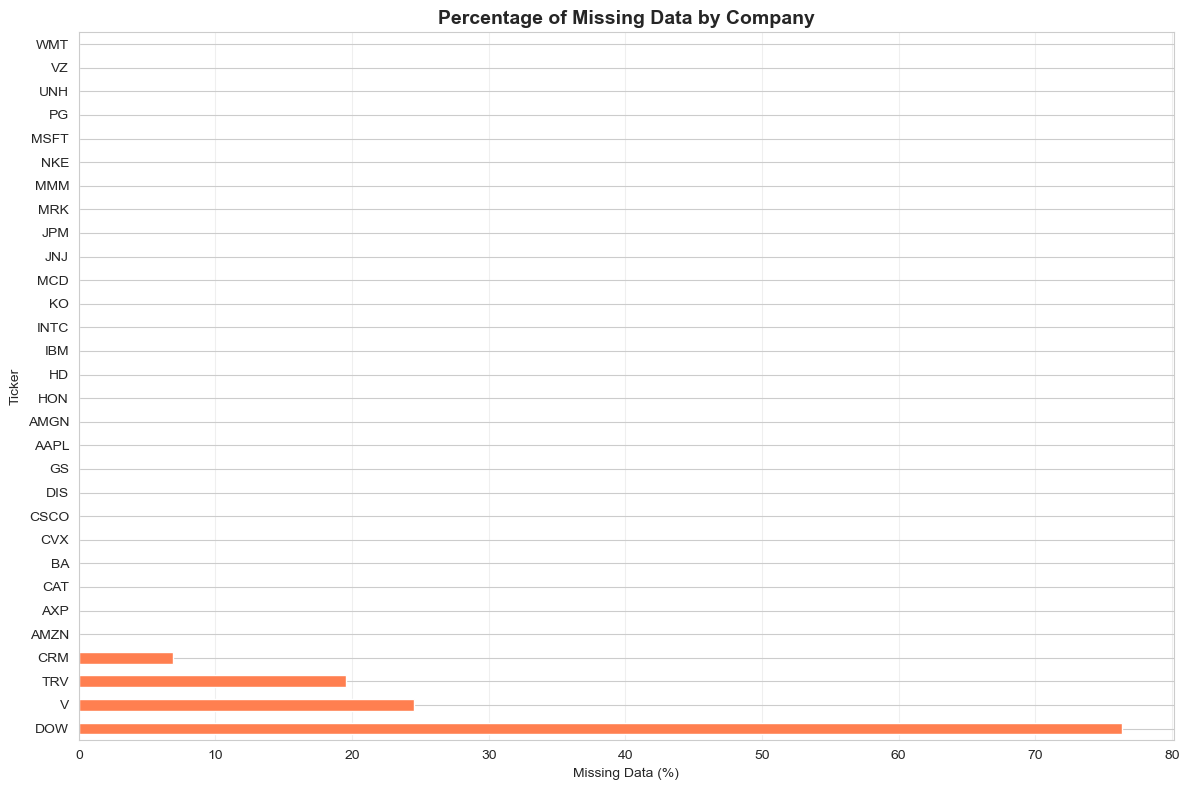

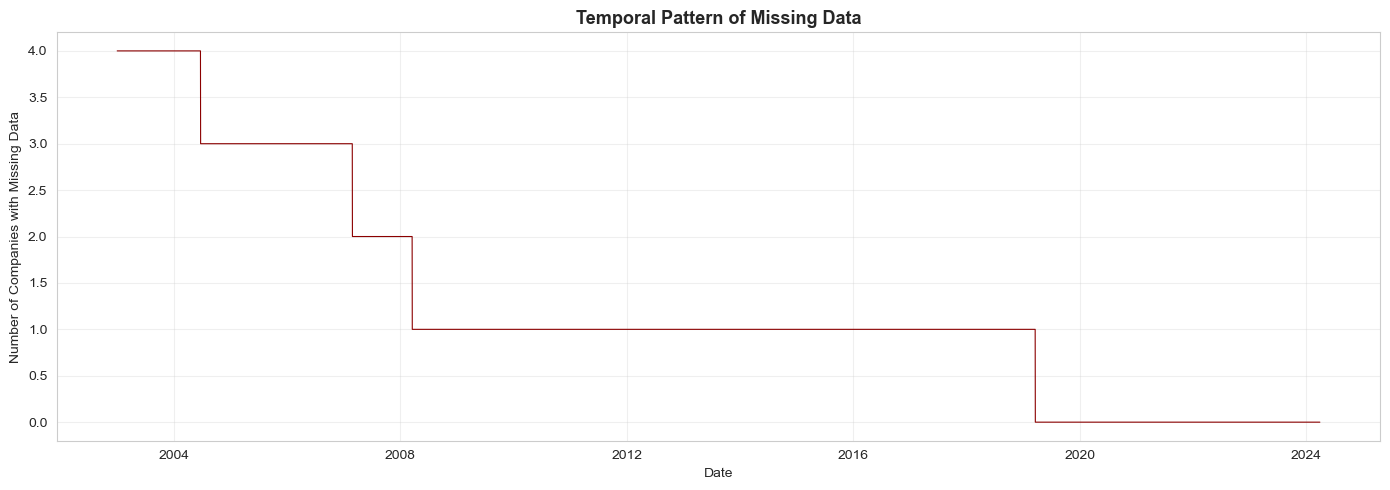

In [29]:
# Analyze missing data by company
missing_by_company = []
for ticker in companies_df[0].tolist():
    rv_ticker = rv_df[ticker]
    missing_count = (rv_ticker == 0).sum()
    missing_pct = (missing_count / len(rv_ticker)) * 100
    
    missing_by_company.append({
        'Ticker': ticker,
        'Missing_Count': missing_count,
        'Missing_%': missing_pct
    })

missing_df = pd.DataFrame(missing_by_company).sort_values('Missing_%', ascending=False)

print("="*60)
print("MISSING DATA BY COMPANY")
print("="*60)
print(missing_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))
missing_df.plot(x='Ticker', y='Missing_%', kind='barh', ax=ax, color='coral', legend=False)
ax.set_xlabel('Missing Data (%)')
ax.set_ylabel('Ticker')
ax.set_title('Percentage of Missing Data by Company', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Temporal pattern of missing data
missing_by_date = (rv_df == 0).sum(axis=1)
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(missing_by_date.index, missing_by_date, linewidth=0.8, color='darkred')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Companies with Missing Data')
ax.set_title('Temporal Pattern of Missing Data', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**11. Correlation Analysis**  
We examine cross-sectional correlations between companies and between different variance measures.

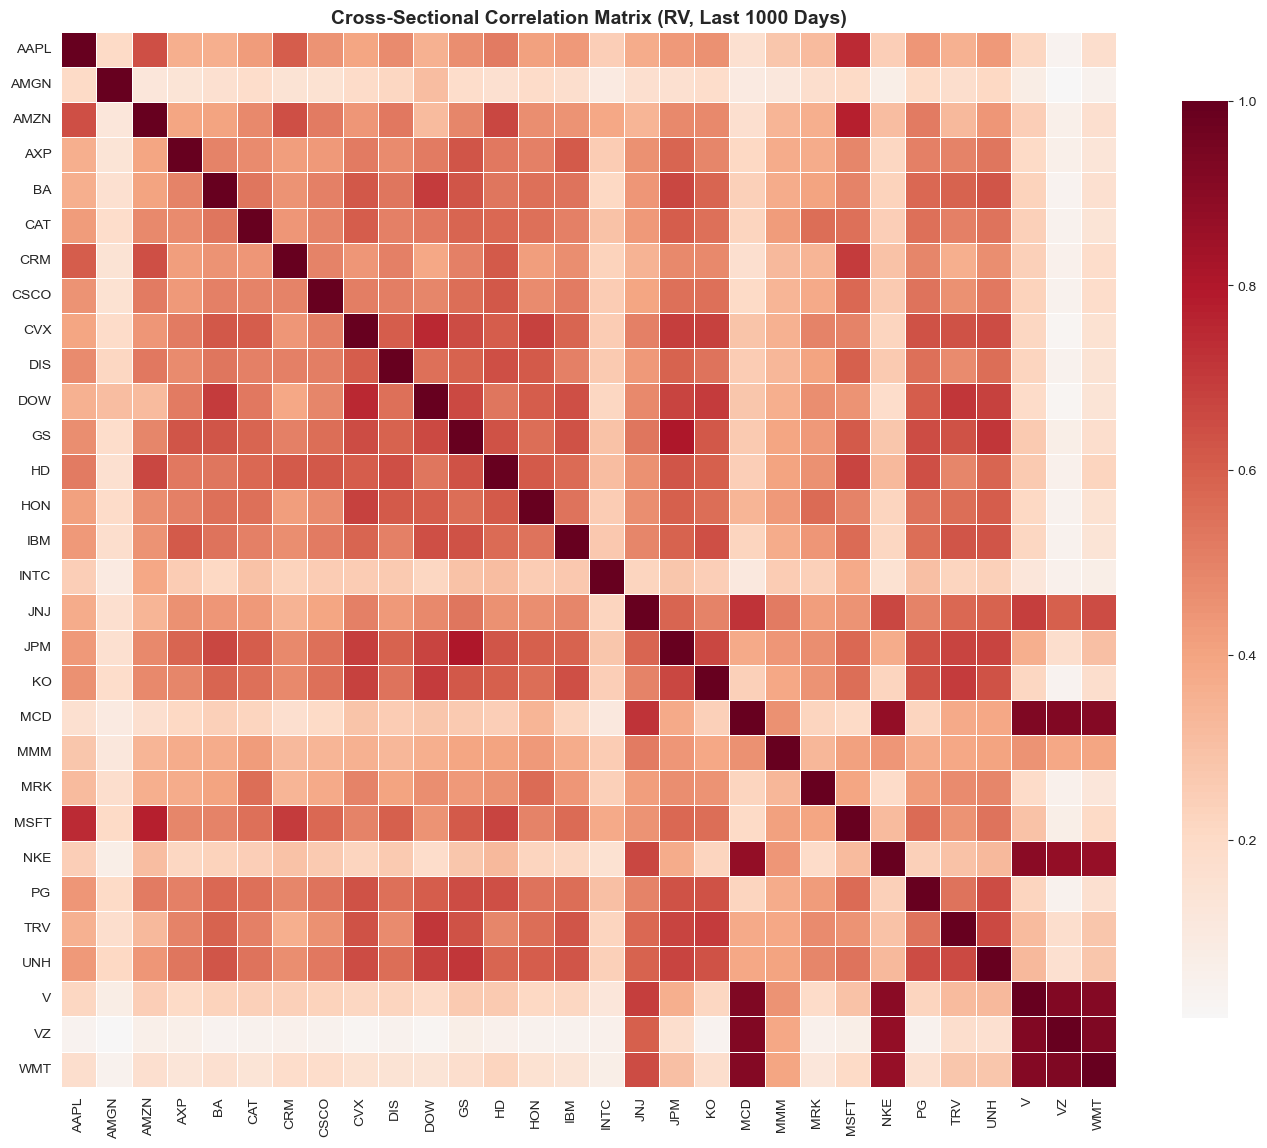


Average pairwise correlation: 0.410


In [30]:
# Calculate correlation matrix for RV (using a subset of dates to avoid memory issues)
rv_sample = rv_df.iloc[-1000:].replace(0, np.nan)  # Last 1000 days
corr_matrix = rv_sample.corr()

# Visualize
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Cross-Sectional Correlation Matrix (RV, Last 1000 Days)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nAverage pairwise correlation: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean():.3f}")

**12. Summary and Key Findings**

**Dataset Characteristics:**
- 20+ years of daily high-frequency volatility measures
- 30 Dow Jones companies
- ~4% missing data (encoded as zeros)
- Heavy right-tailed distribution with extreme values during crises
 
**Key Insights:**
1. **Volatility Clustering**: Clear evidence of persistence in volatility levels
2. **Crisis Periods**: 2008 and 2020 show dramatic spikes in RV across all companies
4. **Company Heterogeneity**: Tech/finance stocks show higher average volatility
5. **Frequency Consistency**: 1-min and 5-min measures are highly correlated
 
**Data Quality Notes:**
- Missing data is minimal and appears non-systematic
- Extreme values are legitimate (verified against known market events)
- Variance decomposition checks out: RV ≈ Good + Bad
 
**Recommendations for Analysis:**
- Replace zeros with NaN for statistical analysis
- Consider log-transformation to handle heavy tails
- Use robust estimators (BPV) when outliers are concerning
- Leverage variance decomposition for jump detection studies

# 540 Project - Vols - EDA 2

## Volatility Feature Definitions

- Realized Variance (RV):
A non-parametric estimate of total daily volatility, computed from high-frequency intraday returns. It captures the overall magnitude of price fluctuations.

- Bipower Variation (BPV):
A robust estimator of the continuous diffusion component of volatility. It removes the effect of jumps and reflects “normal” market volatility.

- Good Variance:
The part of realized variance coming from positive intraday price movements. Often interpreted as volatility associated with upward market moves.

- Bad Variance:
The part of realized variance driven by negative price movements. Commonly linked to downside risk, fear, and bad news.

- Realized Quarticity (RQ):
A higher-order moment of high-frequency returns that measures the variability of volatility itself. Often used to scale standard errors or construct jump tests.

**Processing Dataframe**

In [11]:
### Reading Original Sheets
import pandas as pd

In [12]:
# Define the file path
file_path = file_path = '/Users/pjaram84/Downloads/RV_March2024.xlsx'

# Read the index (Dates) and column names (Companies) sheets
dates = pd.read_excel(file_path, sheet_name='Dates', header=None)[0].values  # Assuming one column for dates
companies = pd.read_excel(file_path, sheet_name='Companies', header=None)[0].values  # Read the first row as header

In [13]:
def read_sheet(name, file_path):
    df = pd.read_excel(file_path, sheet_name=name, header=None)
    df.index = dates
    df.columns = companies
    return df

# Read sheets
rv    = read_sheet("RV", file_path)
rv_5  = read_sheet("RV_5", file_path)
bpv   = read_sheet("BPV", file_path)
bpv_5 = read_sheet("BPV_5", file_path)
good  = read_sheet("Good", file_path)
good_5= read_sheet("Good_5", file_path)
bad   = read_sheet("Bad", file_path)
bad_5 = read_sheet("Bad_5", file_path)
rq    = read_sheet("RQ", file_path)
rq_5  = read_sheet("RQ_5", file_path)

In [14]:
# Convert to long format
def to_long(df, value_name):
    return (df
            .reset_index()
            .melt(id_vars="index", var_name="ticker", value_name=value_name)
            .rename(columns={"index": "date"}))

rv_long    = to_long(rv, "RV")
rv5_long   = to_long(rv_5, "RV_5")
bpv_long   = to_long(bpv, "BPV")
bpv5_long  = to_long(bpv_5, "BPV_5")
good_long  = to_long(good, "Good")
good5_long = to_long(good_5, "Good_5")
bad_long   = to_long(bad, "Bad")
bad5_long  = to_long(bad_5, "Bad_5")
rq_long    = to_long(rq, "RQ")
rq5_long   = to_long(rq_5, "RQ_5")

In [15]:
# 6. Merge all long tables on (date, ticker)
df = rv_long
df = df.merge(bpv_long,  on=["date", "ticker"])
df = df.merge(good_long, on=["date", "ticker"])
df = df.merge(bad_long,  on=["date", "ticker"])
df = df.merge(rq_long,   on=["date", "ticker"])
df = df.merge(rv5_long,  on=["date", "ticker"])
df = df.merge(bpv5_long, on=["date", "ticker"])
df = df.merge(good5_long,on=["date", "ticker"])
df = df.merge(bad5_long, on=["date", "ticker"])
df = df.merge(rq5_long,  on=["date", "ticker"])

df.head()

,date,ticker,RV,BPV,Good,Bad,RQ,RV_5,BPV_5,Good_5,Bad_5,RQ_5
0,02-Jan-2003,AAPL,8.308199,6.201846,5.482017,2.826182,263.025222,6.493909,3.771960,5.102315,1.391595,152.729402
1,03-Jan-2003,AAPL,6.568160,5.331377,3.363345,3.204814,98.476434,6.574494,5.893317,3.638035,2.936459,62.054316
2,06-Jan-2003,AAPL,7.344418,6.179154,3.854715,3.489703,301.882895,5.992264,4.443162,3.879084,2.113180,180.213258
3,07-Jan-2003,AAPL,10.013332,9.130347,5.541810,4.471522,215.268172,9.500654,7.120007,5.782715,3.717939,197.381861
4,08-Jan-2003,AAPL,6.098212,4.921065,3.248214,2.849998,97.966971,4.940525,5.433291,2.473166,2.467359,35.726435


In [16]:
df.shape

(160380, 12)

### Missing-Data Analysis: Zero-Value Periods and First Valid Dates

However, some missing values are recorded as zeros. We would like to determine the missing-data percentage for each company and identify the date from which valid data becomes available.

In [18]:
features = ["RV", "BPV", "Good", "Bad", "RQ", "RV_5", "BPV_5", "Good_5", "Bad_5", "RQ_5"]

df["all_zero"] = (df[features].sum(axis=1) == 0)

# Find the first valid date for each company
start_dates = (
    df[~df["all_zero"]]
    .groupby("ticker")["date"]
    .min()
    .reset_index()
    .rename(columns={"date": "first_valid_date"})
)

# Ensure datetime format
df["date"] = pd.to_datetime(df["date"])
start_dates["first_valid_date"] = pd.to_datetime(start_dates["first_valid_date"])

# Check missing values after the first valid date for each ticker
results = []

for _, row in start_dates.iterrows():
    t = row["ticker"]
    fd = row["first_valid_date"]
    
    sub = df[(df["ticker"] == t) & (df["date"] >= fd)]
    after_missing = sub["all_zero"].sum()
    
    results.append({
        "ticker": t,
        "first_valid_date": fd.date(),
        "missing_after_start": int(after_missing)
    })

results_df = pd.DataFrame(results)
results_df

,ticker,first_valid_date,missing_after_start
0,AAPL,2003-04-01,0
1,AMGN,2003-04-01,0
2,AMZN,2003-04-01,0
3,AXP,2003-04-01,0
4,BA,2003-04-01,0
5,CAT,2003-04-01,0
6,CRM,2005-04-01,0
7,CSCO,2003-04-01,0
8,CVX,2003-04-01,0
9,DIS,2003-04-01,0


### Missing-Data Analysis: Zero-Value Periods and First Valid Dates

However, some missing values are recorded as zeros. We would like to determine the missing-data percentage for each company and identify the date from which valid data becomes available.

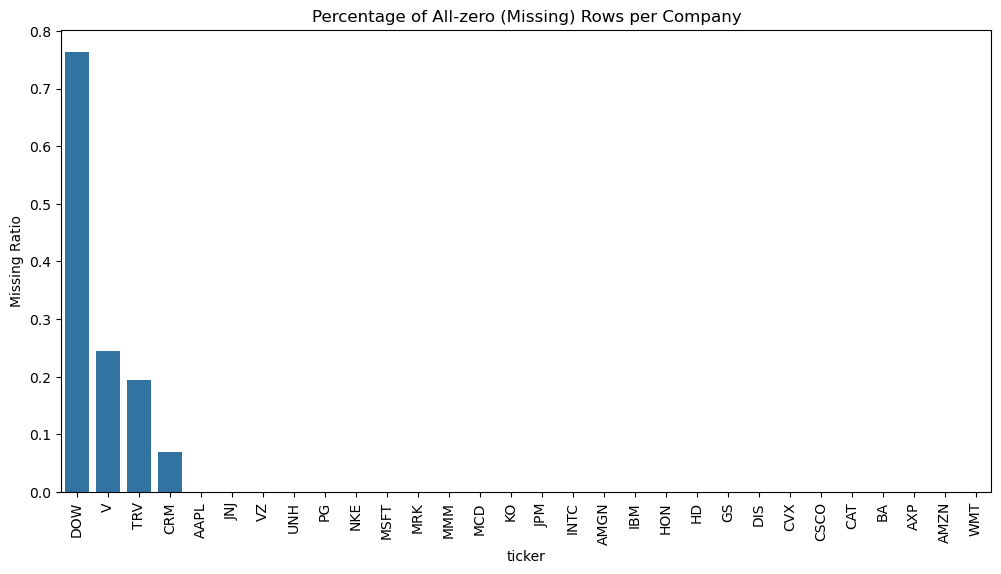

Companies with missing data (zero-recorded values):
DOW: 0.763
V: 0.245
TRV: 0.195
CRM: 0.069


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate missing pct
zero_ratio = (df.groupby("ticker")["all_zero"].mean().sort_values(ascending=False))

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=zero_ratio.index, y=zero_ratio.values)
plt.xticks(rotation=90)
plt.title("Percentage of All-zero (Missing) Rows per Company")
plt.ylabel("Missing Ratio")
plt.show()

# print companies with missing values
missing_companies = zero_ratio[zero_ratio > 0]

print("Companies with missing data (zero-recorded values):")
for ticker, ratio in missing_companies.items():
    print(f"{ticker}: {ratio:.3f}")

In [23]:
df_clean = df[df["date"] >= "2019-04-01"].copy()

We focus on the 2019–2024 window because it is the first period where all 30 DJIA companies have complete, non-missing volatility data. This avoids zero-recorded gaps and produces a clean and consistent dataset for EDA. The five-year window is also large enough (≈37k observations) and includes diverse market regimes such as the COVID crash, the rate-hiking cycle, and the recent recovery, providing rich dynamics for volatility analysis.

For modeling, this period allows us to build stable and meaningful machine-learning pipelines using log-transformed features, lagged volatility measures (e.g., RV_lag1, RV_lag5), and jump-related metrics. We plan to construct baseline models—including Linear Regression, Random Forest, and XGBoost—which are well suited for short-memory volatility processes and should perform reliably on this clean subset.

## Exploratory Data Analysis (EDA)

In [ ]:
sns.set(style="whitegrid")
features = ["RV", "BPV", "Good", "Bad", "RQ"]

### Summary Statistics

In [24]:
df_clean[features].describe()

,RV,BPV,Good,Bad,RQ,RV_5,BPV_5,Good_5,Bad_5,RQ_5
count,37740.000000,37740.000000,37740.000000,37740.000000,3.774000e+04,37740.000000,37740.000000,37740.000000,37740.000000,37740.000000
mean,2.449635,2.316838,1.229991,1.219644,2.645029e+02,2.407247,2.240200,1.209101,1.198146,107.876478
std,5.656053,5.205469,2.917187,2.844805,1.353211e+04,5.750085,5.479980,3.001342,2.976101,2945.709407
min,0.087226,0.072268,0.038783,0.048443,1.990372e-02,0.076382,0.044576,0.026178,0.029149,0.009457
25%,0.859341,0.806109,0.421202,0.420934,1.925502e+00,0.777224,0.708541,0.364326,0.357222,1.035600
50%,1.382639,1.309991,0.683064,0.687491,5.270518e+00,1.309651,1.202624,0.631101,0.630939,3.211980
75%,2.371797,2.256750,1.179179,1.188674,1.607663e+01,2.335404,2.157873,1.149625,1.167916,11.277121
max,336.956983,312.806802,152.008985,184.947998,2.234740e+06,352.439892,379.222197,165.920602,186.519290,340933.402098


In [25]:
skewness = df_clean[features].skew()
kurtosis = df_clean[features].kurt()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 RV         16.312037
BPV        15.942165
Good       15.650130
Bad        18.001149
RQ        129.929276
RV_5       16.778202
BPV_5      18.672704
Good_5     15.301672
Bad_5      19.324377
RQ_5       71.687084
dtype: float64

Kurtosis:
 RV          524.074132
BPV         519.765772
Good        433.200003
Bad         663.599458
RQ        20148.133560
RV_5        560.985439
BPV_5       769.495934
Good_5      433.269385
Bad_5       712.622322
RQ_5       6413.226685
dtype: float64


The volatility measures (RV, BPV, Good, Bad, RQ) exhibit extremely strong right-skewness and heavy-tailed behavior.  
Both skewness and kurtosis values are unusually high, indicating that:

1. Most observations are concentrated near very small values.
2. A small number of extreme volatility spikes stretch the right tail of the distribution.
3. Realized Quarticity (RQ) is especially heavy-tailed, consistent with its sensitivity to jump and tail risk.

This confirms that the volatility features are highly non-normal and dominated by rare but extreme market events (e.g., COVID crash, rate-hike shocks).  
For modeling, these statistics suggest the need for log-transformations or other scaling techniques to stabilize the distribution and improve model performance.

### Distribution Analysis

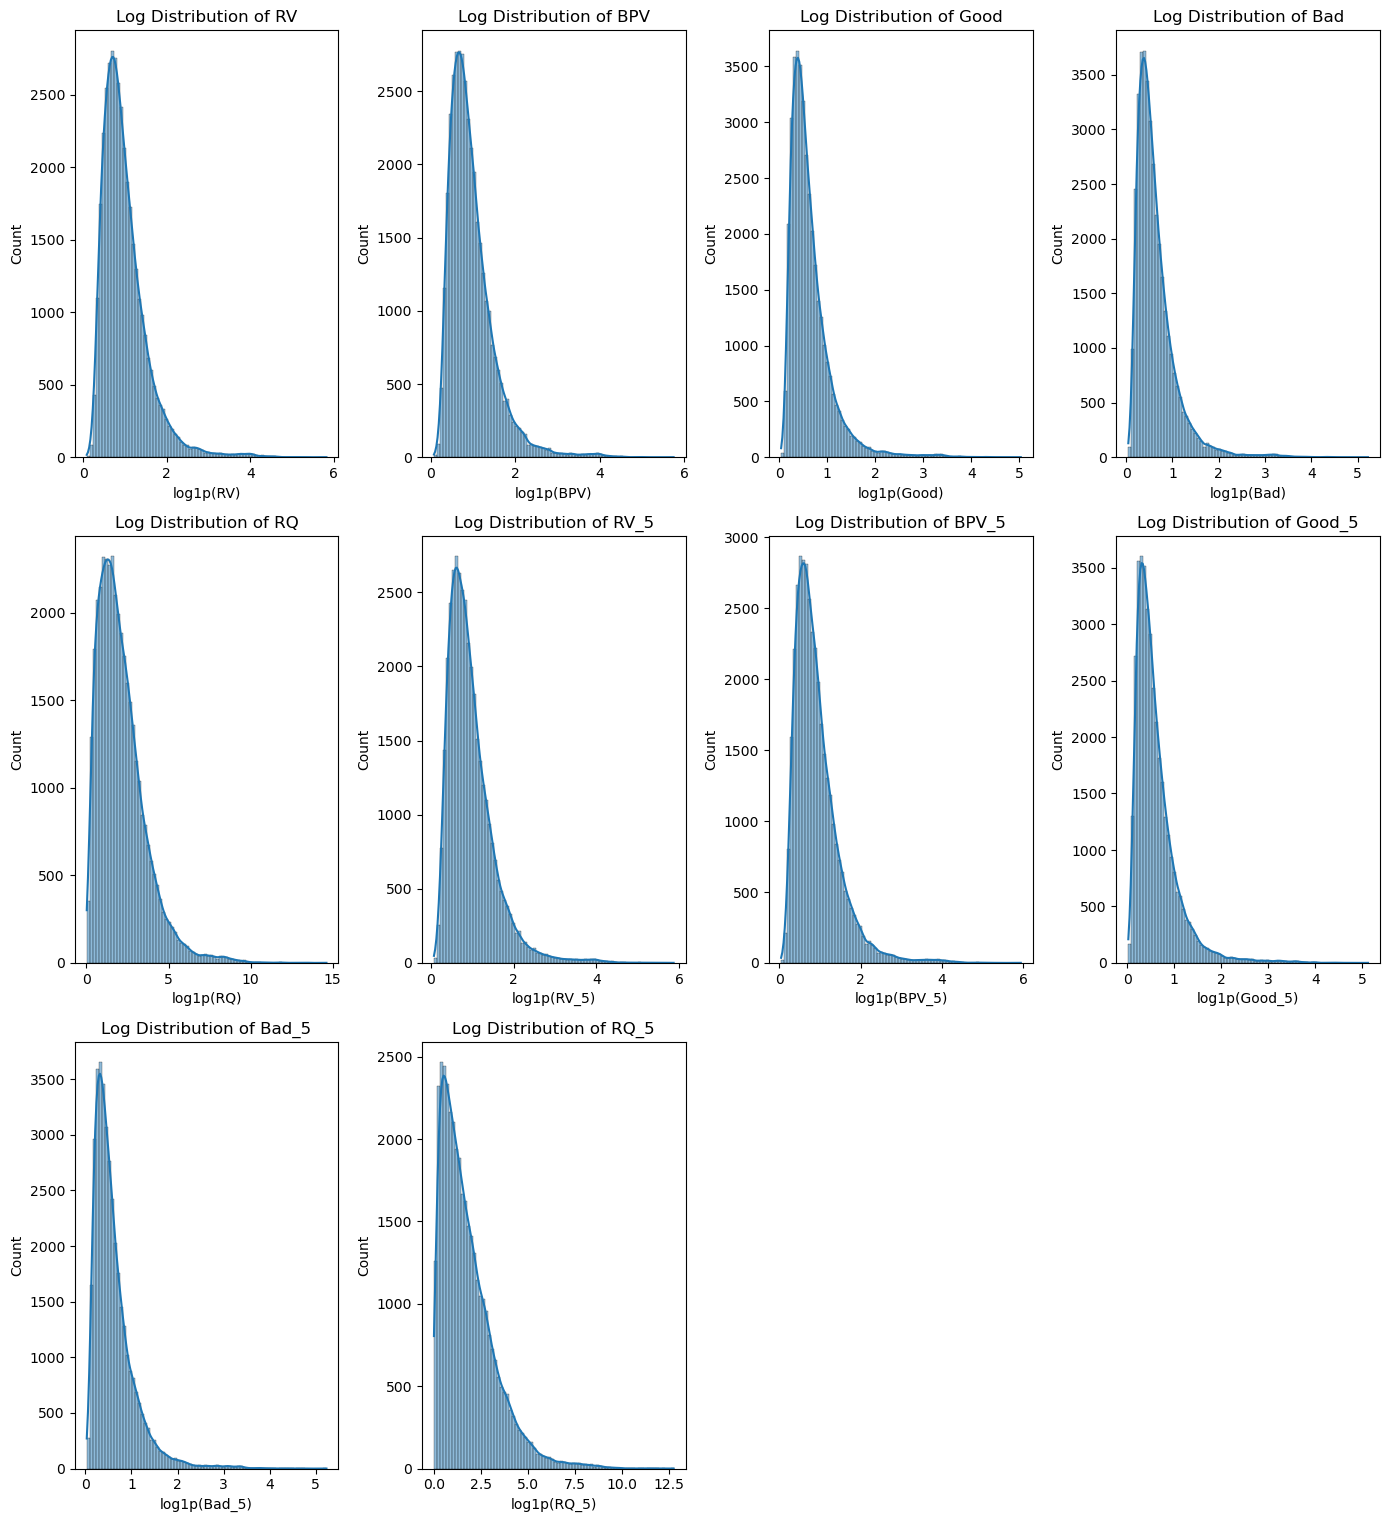

In [38]:
import math

n = len(features)
rows = math.ceil(n / 2)

plt.figure(figsize=(14, 5 * rows))

for i, f in enumerate(features, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(np.log1p(df_clean[f]), kde=True, bins=80)
    plt.title(f"Log Distribution of {f}")
    plt.xlabel(f"log1p({f})")

plt.tight_layout()
plt.show()


Note: We removed the raw-scale distribution plots because the volatility measures are extremely right-skewed, making the visualizations uninformative. The log-transformed distributions provide a much clearer and more meaningful view for EDA and modeling.

### Boxplots

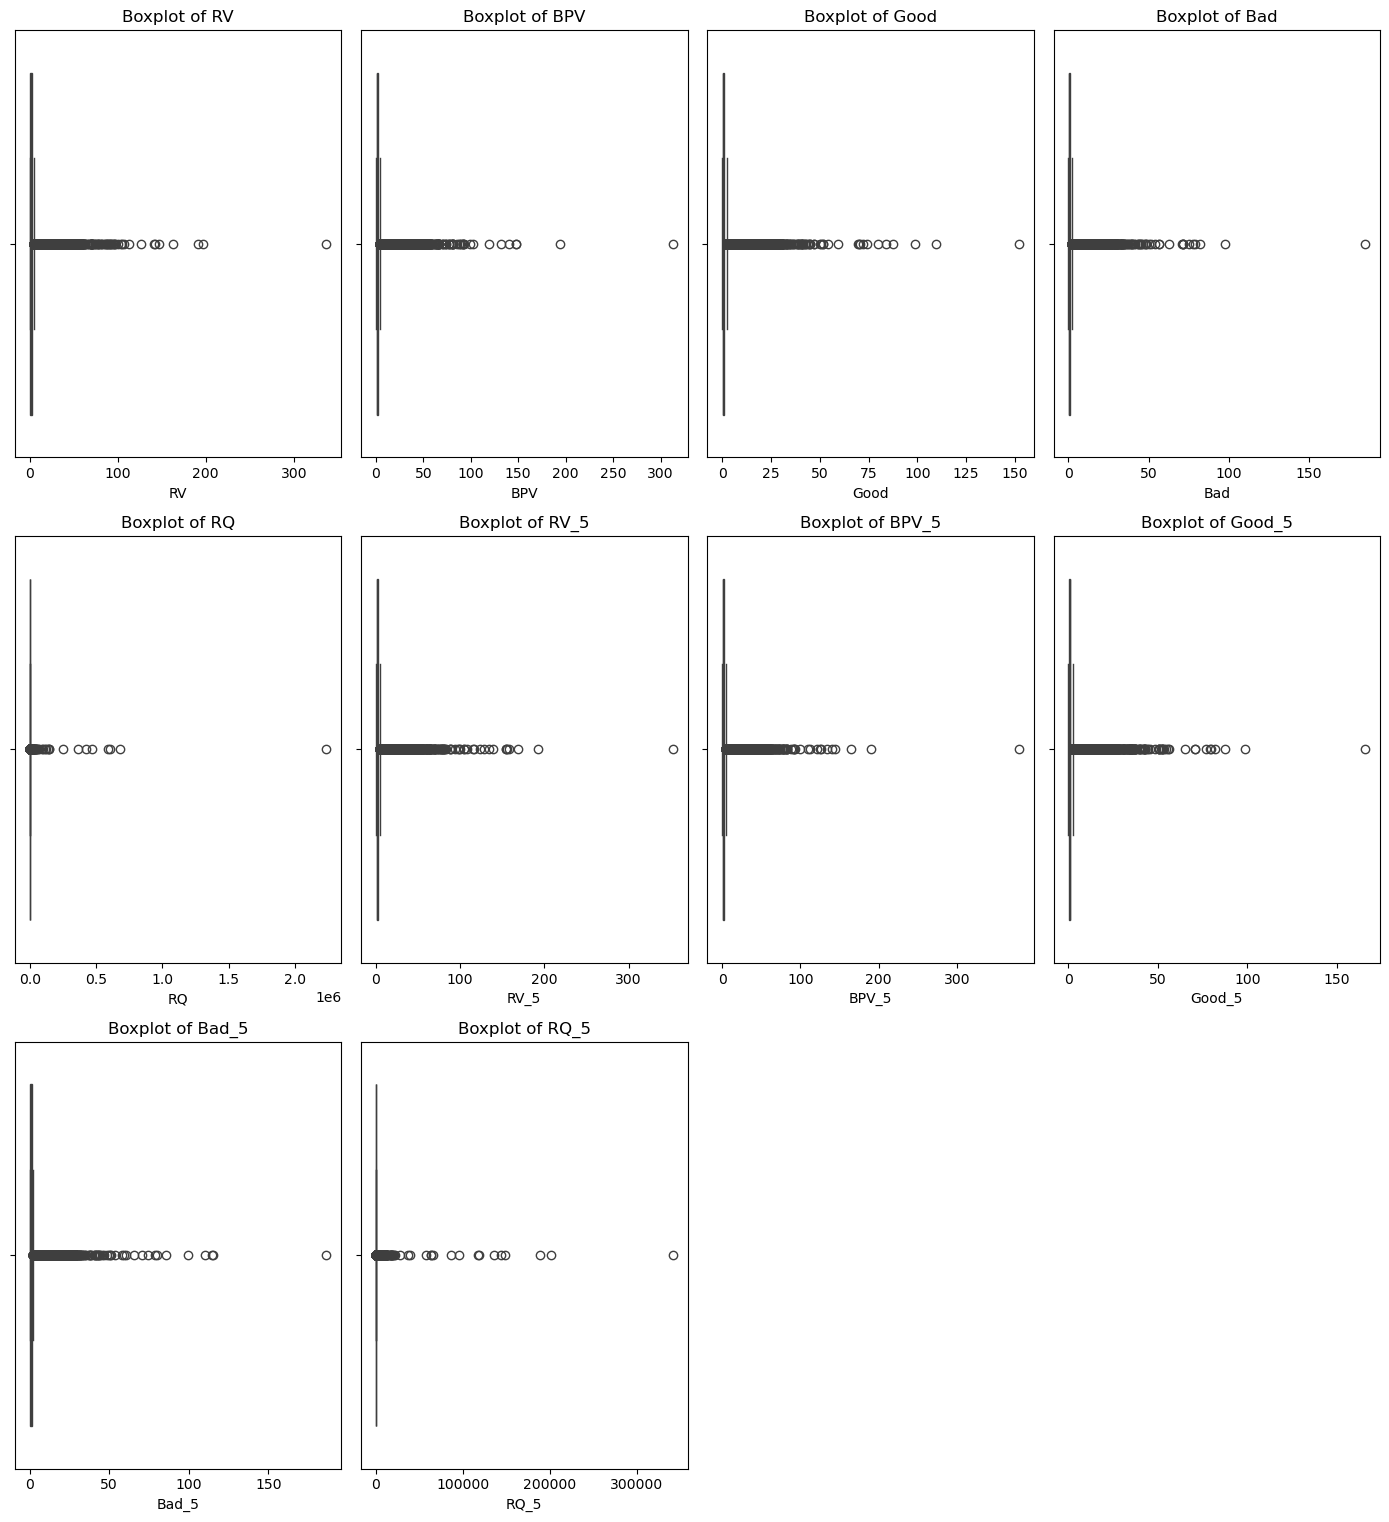

In [41]:
import math

n = len(features)
rows = math.ceil(n / 2)

plt.figure(figsize=(14, 5 * rows))

for i, f in enumerate(features, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df_clean[f])
    plt.title(f"Boxplot of {f}")

plt.tight_layout()
plt.show()


The boxplots show a very large number of outliers across all volatility measures.
This is expected because high-frequency volatility metrics exhibit heavy-tailed behavior.
Many “outliers” correspond to real volatility spikes (e.g., COVID-19 or major market events), not errors.

### Time Series Overview

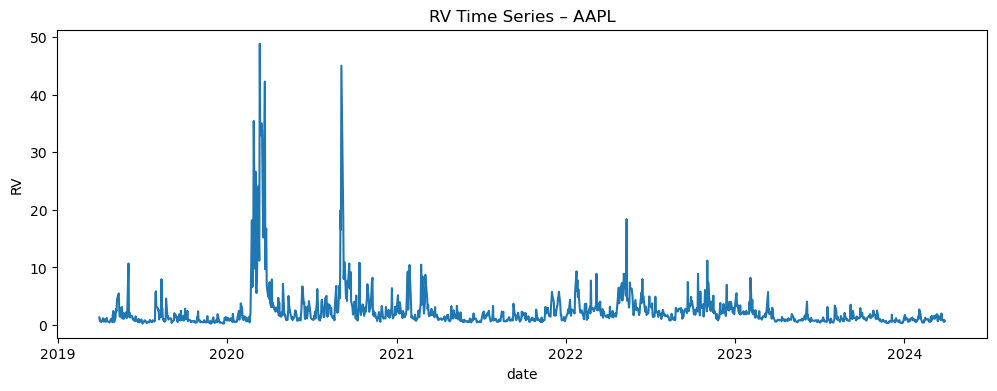

In [42]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_clean[df_clean["ticker"]=="AAPL"], x="date", y="RV")
plt.title("RV Time Series – AAPL")
plt.show()

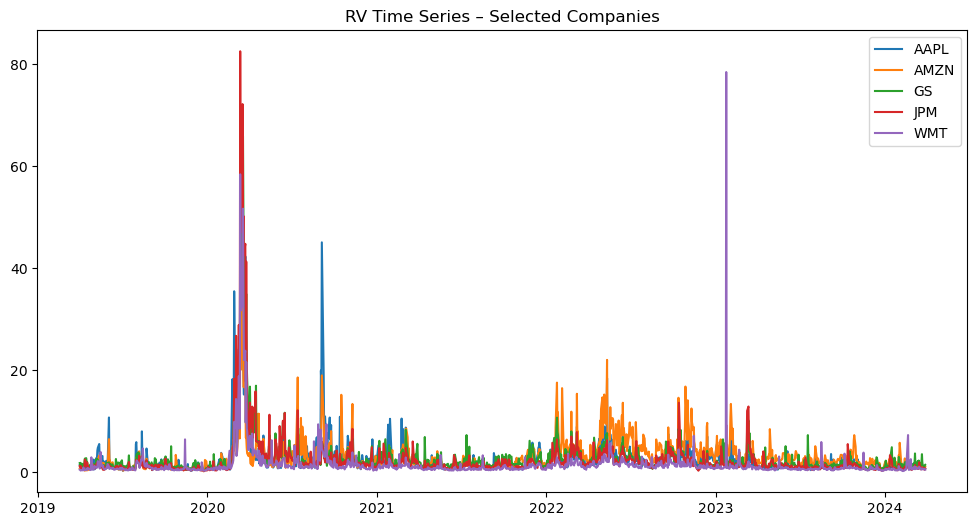

In [43]:
sample_tickers = ["AAPL", "AMZN", "GS", "JPM", "WMT"]

plt.figure(figsize=(12,6))
for t in sample_tickers:
    sub = df_clean[df_clean["ticker"]==t]
    plt.plot(sub["date"], sub["RV"], label=t)

plt.legend()
plt.title("RV Time Series – Selected Companies")
plt.show()

It is not necessary (and not even useful) to plot 30 time-series curves on one figure, because the plot would become visually cluttered and impossible to interpret. Instead, we select a small representative subset of companies—covering different sectors (e.g., tech, retail, finance, industrials)—to illustrate the overall volatility patterns.

Across these selected firms, the time-series show very similar dynamics: large spikes during the COVID-19 crash (2020), elevated volatility during inflation and rate-hike cycles (2021–2022), and a calmer regime in 2023–2024. This similarity is expected because all DJIA constituents are influenced by the same macro-financial shocks. The purpose of the overview is to confirm that the volatility behavior is broadly consistent across the index, before we move to feature engineering and modeling.

### Cross-Sectional Comparison

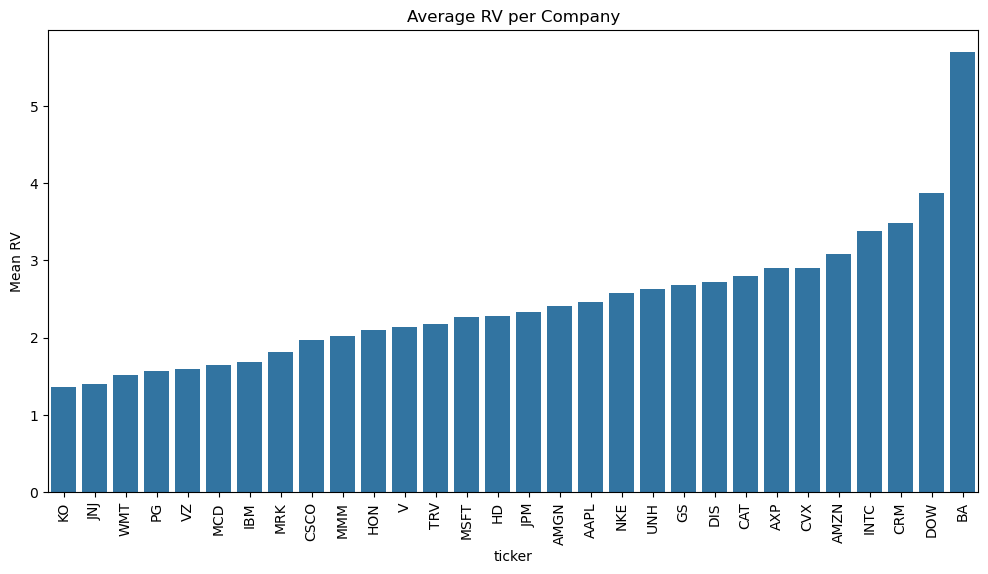

In [44]:
mean_rv = df_clean.groupby("ticker")["RV"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=mean_rv.index, y=mean_rv.values)
plt.xticks(rotation=90)
plt.title("Average RV per Company")
plt.ylabel("Mean RV")
plt.show()

### Correlation Analysis

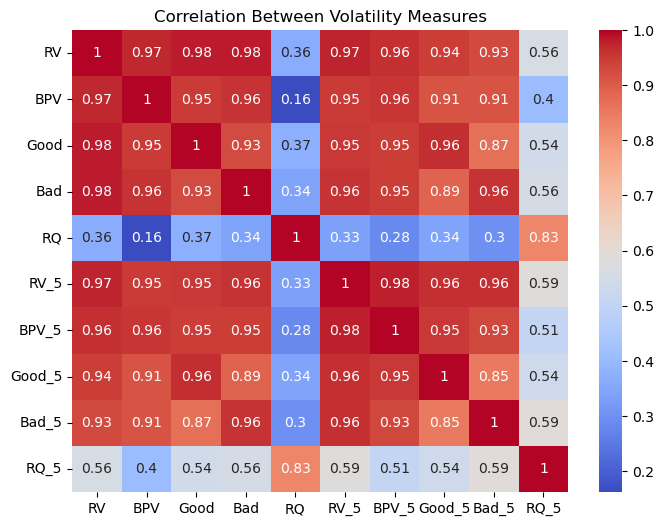

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Volatility Measures")
plt.show()

The heatmap shows strong positive correlations among RV, BPV, Good, and Bad, indicating that these volatility measures move closely together and capture similar market dynamics. Realized Quarticity (RQ), however, has much weaker correlations with the other measures, suggesting that it contains different higher-order information related to tail risk and extreme returns. This distinction is important for modeling: RV/BPV/Good/Bad may be partially redundant, while RQ can provide additional independent signals about volatility behavior.

### Jump Analysis

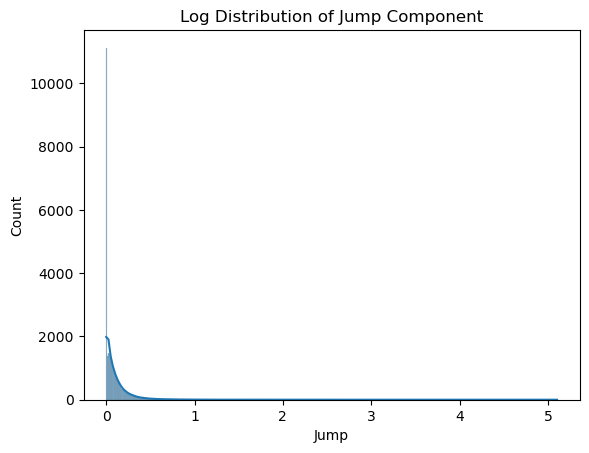

In [47]:
df_clean["Jump"] = df_clean["RV"] - df_clean["BPV"]

sns.histplot(np.log1p(df_clean["Jump"].clip(lower=0)), kde=True)
plt.title("Log Distribution of Jump Component")
plt.show()

The distribution plot shows that jump values are extremely sparse—most days have almost no jump activity, but a few days exhibit large spikes, consistent with the idea that jumps represent rare but impactful market events.

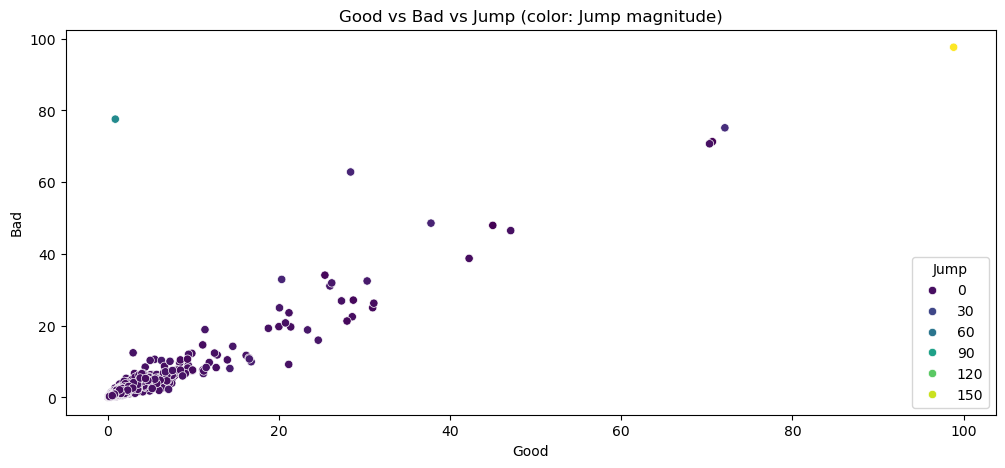

In [49]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_clean.sample(5000), x="Good", y="Bad", hue="Jump", palette="viridis")
plt.title("Good vs Bad vs Jump (color: Jump magnitude)")
plt.show()

The scatter plot of Good vs. Bad variance (colored by jump magnitude) highlights that large jumps typically occur on days with elevated volatility, reinforcing the interpretation that jump components capture extreme market movements. Including the jump feature can improve volatility forecasting and is widely used in financial econometrics.